In [10]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


# Imports ML
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# Otimizando os modelos de machine learning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
import pickle



pd.options.mode.chained_assignment = None  # default='warn'

# Importando

Iniciando os tratamentos dos dados pela importação e normalização das informações, ajustando as colunas e tendo uma visão inicial do dataset

In [11]:
#data = json.load(open('DadosColetados/Details/top100/top_100.json'))
data = json.load(open('top_100.json')) # Arquivo atualizado
data_norm = pd.json_normalize(data)
data_norm.head()

id                                       title  start_date    end_date  \
0   7311               Suzumiya Haruhi no Shoushitsu  2010-02-06  2010-02-06   
1  15417                         Gintama': Enchousen  2012-10-04  2013-03-28   
2    820                        Ginga Eiyuu Densetsu  1988-01-08  1997-03-17   
3  41467                   Bleach: Sennen Kessen-hen  2022-10-11  2022-12-27   
4  43608  Kaguya-sama wa Kokurasetai: Ultra Romantic  2022-04-09  2022-06-25   

                                            synopsis  mean  rank  popularity  \
0  On a cold December day, Kyon arrives at school...  8.60   101         365   
1  While Gintoki Sakata was away, the Yorozuya fo...  9.02    10         754   
2  The 150-year-long stalemate between the two in...  9.01    11         758   
3  Substitute Soul Reaper Ichigo Kurosaki spends ...  9.00    12         380   
4  The elite members of Shuchiin Academy's studen...  8.99    13         169   

   num_list_users  num_scoring_users  ... start_season.year  \
0          624337             317506  ...              2010   
1          336116             170327  ...              2012   
2          335136              81967  ...              1988   
3          604249             318499  ...              2022   
4          996461             564191  ...              2022   

  start_season.season statistics.status.watching statistics.status.completed  \
0              winter                      16433                      403848   
1                fall                      11430                      216490   
2              winter                      35385                       75166   
3                fall                      87054                      356742   
4              spring                      90670                      663475   

  statistics.status.on_hold statistics.status.dropped  \
0                      6586                      5271   
1                      3872                      3107   
2                     20526                      9012   
3                      7763                      5206   
4                     14630                     10671   

   statistics.status.plan_to_watch statistics.num_list_users  \
0                           192168                    624306   
1                           101206                    336105   
2                           195038                    335127   
3                           147432                    604197   
4                           216969                    996415   

   broadcast.day_of_the_week broadcast.start_time  
0                        NaN                  NaN  
1                   thursday                18:00  
2                        NaN                  NaN  
3                    tuesday                00:00  
4                   saturday                00:00  

[5 rows x 39 columns]

In [12]:
data_sort = data_norm.sort_values(by=['rank'], ignore_index=True)
data_backup = data_sort.copy()
data_sort.head()

id                               title  start_date    end_date  \
0  52991                   Sousou no Frieren  2023-09-29  2024-03-22   
1   5114    Fullmetal Alchemist: Brotherhood  2009-04-05  2010-07-04   
2  60022                One Piece Fan Letter  2024-10-20  2024-10-20   
3   9253                         Steins;Gate  2011-04-06  2011-09-14   
4  38524  Shingeki no Kyojin Season 3 Part 2  2019-04-29  2019-07-01   

                                            synopsis  mean  rank  popularity  \
0  During their decade-long quest to defeat the D...  9.31     1         171   
1  After a horrific alchemy experiment goes wrong...  9.10     2           3   
2  Although the golden age of piracy is about to ...  9.07     3        2546   
3  Eccentric scientist Rintarou Okabe has a never...  9.07     4          14   
4  Seeking to restore humanity's diminishing hope...  9.05     5          21   

   num_list_users  num_scoring_users  ... start_season.year  \
0          989481             571459  ...              2023   
1         3459792            2182720  ...              2009   
2           78968              60363  ...              2024   
3         2650625            1440989  ...              2011   
4         2386309            1656481  ...              2019   

  start_season.season statistics.status.watching statistics.status.completed  \
0                fall                     209987                      567730   
1              spring                     267557                     2500857   
2                fall                       3391                       67550   
3              spring                     173242                     1661997   
4              spring                      81451                     2154576   

  statistics.status.on_hold statistics.status.dropped  \
0                     18963                     12628   
1                    115676                     61635   
2                       243                       453   
3                     91602                     58142   
4                      9652                      8009   

   statistics.status.plan_to_watch statistics.num_list_users  \
0                           179974                    989282   
1                           513982                   3459707   
2                             7321                     78958   
3                           665529                   2650512   
4                           132561                   2386249   

   broadcast.day_of_the_week broadcast.start_time  
0                     friday                23:00  
1                     sunday                17:00  
2                        NaN                  NaN  
3                  wednesday                02:05  
4                     monday                00:10  

[5 rows x 39 columns]

# Tratamento

Após a importação se inicia o tratamento, para isso é necessário verificar todos os tipos de colunas, além de valores estranhos e valores nulos, assim que identificados, serão tratados, limpando e ajustando as informações.

Como poucos valores foram identificados como anormais, a opção foi por tratar individualmente de cada, os mesmo vale para os valores nulos.

In [13]:
data_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               100 non-null    int64  
 1   title                            100 non-null    object 
 2   start_date                       100 non-null    object 
 3   end_date                         97 non-null     object 
 4   synopsis                         100 non-null    object 
 5   mean                             100 non-null    float64
 6   rank                             100 non-null    int64  
 7   popularity                       100 non-null    int64  
 8   num_list_users                   100 non-null    int64  
 9   num_scoring_users                100 non-null    int64  
 10  nsfw                             100 non-null    object 
 11  created_at                       100 non-null    object 
 12  updated_at             

In [14]:
data_sort.isnull().sum()

id                                  0
title                               0
start_date                          0
end_date                            3
synopsis                            0
mean                                0
rank                                0
popularity                          0
num_list_users                      0
num_scoring_users                   0
nsfw                                0
created_at                          0
updated_at                          0
media_type                          0
status                              0
genres                              0
num_episodes                        0
source                              0
average_episode_duration            0
rating                              0
pictures                            0
background                          0
studios                             0
ingestion_time                      0
main_picture.medium                 0
main_picture.large                  0
alternative_

In [15]:
value_1 = 52991
value_100 = 28735

 
result = data_sort.loc[data_sort['id'] == value_100]
#result


Empty DataFrame
Columns: [id, title, start_date, end_date, synopsis, mean, rank, popularity, num_list_users, num_scoring_users, nsfw, created_at, updated_at, media_type, status, genres, num_episodes, source, average_episode_duration, rating, pictures, background, studios, ingestion_time, main_picture.medium, main_picture.large, alternative_titles.synonyms, alternative_titles.en, alternative_titles.ja, start_season.year, start_season.season, statistics.status.watching, statistics.status.completed, statistics.status.on_hold, statistics.status.dropped, statistics.status.plan_to_watch, statistics.num_list_users, broadcast.day_of_the_week, broadcast.start_time]
Index: []

[0 rows x 39 columns]

In [16]:
data_sort[data_sort['end_date'].isnull()]

id                                             title  start_date  \
50     21                                         One Piece  1999-10-20   
57  54857  Re:Zero kara Hajimeru Isekai Seikatsu 3rd Season  2024-10-02   
61  56752                    Shiguang Dailiren: Yingdu Pian  2024-12-27   

   end_date                                           synopsis  mean  rank  \
50      NaN  Barely surviving in a barrel after passing thr...  8.73    52   
57      NaN  One year after the events at the Sanctuary, Su...  8.71    59   
61      NaN  To save the deceased Cheng Xiaoshi, Lu Guang r...  8.70    63   

    popularity  num_list_users  num_scoring_users  ... start_season.year  \
50          17         2472627            1404679  ...              1999   
57         764          332772              57712  ...              2024   
61        4319           29098               1797  ...              2024   

   start_season.season statistics.status.watching statistics.status.completed  \
50                fall                    1751886                          50   
57                fall                     163357                         212   
61                fall                       8866                           6   

   statistics.status.on_hold statistics.status.dropped  \
50                    299717                    196873   
57                     10742                      2301   
61                       283                        72   

    statistics.status.plan_to_watch statistics.num_list_users  \
50                           223987                   2472513   
57                           156085                    332697   
61                            19869                     29096   

    broadcast.day_of_the_week broadcast.start_time  
50                     sunday                09:30  
57                  wednesday                22:30  
61                        NaN                  NaN  

[3 rows x 39 columns]

In [17]:
idx = data_sort[data_sort['end_date'].isnull()].index
#idx

In [18]:
#data_sort[data_sort['end_date'].isnull()] = data_sort['end_date'].apply(lambda x: 'present')
#data_sort[data_sort['end_date'].isnull()]

data_sort.loc[idx, 'end_date'] = 'present'
#data_sort.loc[idx, 'end_date']

In [19]:
data_sort[data_sort['broadcast.day_of_the_week'].isnull()]

id                                              title  start_date  \
2   60022                               One Piece Fan Letter  2024-10-20   
6   39486                                 Gintama: The Final  2021-01-08   
10    820                               Ginga Eiyuu Densetsu  1988-01-08   
17  28851                                     Koe no Katachi  2016-09-17   
20  15335  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...  2013-07-06   
24  35247                         Owarimonogatari 2nd Season  2017-08-12   
25  51535  Shingeki no Kyojin: The Final Season - Kankets...  2023-03-04   
26  37987                            Violet Evergarden Movie  2020-09-18   
27  32281                                     Kimi no Na wa.  2016-08-26   
32  31758                   Kizumonogatari III: Reiketsu-hen  2017-01-06   
34    199                      Sen to Chihiro no Kamikakushi  2001-07-20   
45  52198  Kaguya-sama wa Kokurasetai: First Kiss wa Owar...  2022-12-17   
46  45649                                The First Slam Dunk  2022-12-03   
47  44074                                  Shiguang Dailiren  2021-04-30   
51   2921                                    Ashita no Joe 2  1980-10-13   
56  57864            Monogatari Series: Off & Monster Season  2024-07-06   
61  56752                     Shiguang Dailiren: Yingdu Pian  2024-12-27   
63     44  Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...  1999-02-20   
64  58125                                          Look Back  2024-06-28   
66  40434                         Mo Dao Zu Shi: Wanjie Pian  2021-08-07   
70    431                                Howl no Ugoku Shiro  2004-11-20   
71    164                                      Mononoke Hime  1997-07-12   
72  50399                                  Tian Guan Cifu Er  2023-10-18   
73  33050  Fate/stay night Movie: Heaven's Feel - III. Sp...  2020-08-15   
80  49413                               Shiguang Dailiren II  2023-07-14   
84  52742              Haikyuu!! Movie: Gomisuteba no Kessen  2024-02-16   
91  36862   Made in Abyss Movie 3: Fukaki Tamashii no Reimei  2020-01-17   
93  42310                             Cyberpunk: Edgerunners  2022-09-13   
99   7311                      Suzumiya Haruhi no Shoushitsu  2010-02-06   

      end_date                                           synopsis  mean  rank  \
2   2024-10-20  Although the golden age of piracy is about to ...  9.07     3   
6   2021-01-08  Two years have passed following the Tendoshuu'...  9.04     7   
10  1997-03-17  The 150-year-long stalemate between the two in...  9.01    11   
17  2016-09-17  As a wild youth, elementary school student Sho...  8.93    18   
20  2013-07-06  When Gintoki apprehends a movie pirate at a pr...  8.90    21   
24  2017-08-13  Following an encounter with oddity specialist ...  8.87    25   
25  2023-11-05  In the wake of Eren Yeager's cataclysmic actio...  8.87    26   
26  2020-09-18  Several years have passed since the end of The...  8.85    27   
27  2016-08-26  Mitsuha Miyamizu, a high school girl, yearns t...  8.83    28   
32  2017-01-06  After helping revive the legendary vampire Kis...  8.78    34   
34  2001-07-20  Stubborn, spoiled, and naïve, 10-year-old Chih...  8.77    36   
45  2022-12-17  After their first kiss, Kaguya Shinomiya and M...  8.75    47   
46  2022-12-03  Shohoku's "speedster" and point guard, Ryouta ...  8.74    48   
47  2021-07-09  It is said that a picture is worth a thousand ...  8.73    49   
51  1981-08-31  Yabuki Joe is left downhearted and hopeless af...  8.73    53   
56  2024-10-19  Koyomi Araragi spent his last year of high sch...  8.71    58   
61     present  To save the deceased Cheng Xiaoshi, Lu Guang r...  8.70    63   
63  1999-09-22  When mankind's savagery surpasses his fear of ...  8.70    65   
64  2024-06-28  Ayumu Fujino may only be in the fourth grade, ...  8.69    66   
66  2021-10-16  Along an empty road in the rural countryside, ...  8.68    68   
70  2004-11-20  That jumb

In [20]:
idx = data_sort[data_sort['broadcast.day_of_the_week'].isnull()].index
#idx

In [21]:
data_sort.loc[idx, 'broadcast.day_of_the_week'] = 'friday'
#data_sort.loc[idx, 'broadcast.day_of_the_week']

In [22]:
data_sort[data_sort['broadcast.start_time'].isnull()]

id                                              title  start_date  \
2   60022                               One Piece Fan Letter  2024-10-20   
6   39486                                 Gintama: The Final  2021-01-08   
10    820                               Ginga Eiyuu Densetsu  1988-01-08   
17  28851                                     Koe no Katachi  2016-09-17   
20  15335  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...  2013-07-06   
24  35247                         Owarimonogatari 2nd Season  2017-08-12   
25  51535  Shingeki no Kyojin: The Final Season - Kankets...  2023-03-04   
26  37987                            Violet Evergarden Movie  2020-09-18   
27  32281                                     Kimi no Na wa.  2016-08-26   
32  31758                   Kizumonogatari III: Reiketsu-hen  2017-01-06   
34    199                      Sen to Chihiro no Kamikakushi  2001-07-20   
45  52198  Kaguya-sama wa Kokurasetai: First Kiss wa Owar...  2022-12-17   
46  45649                                The First Slam Dunk  2022-12-03   
47  44074                                  Shiguang Dailiren  2021-04-30   
51   2921                                    Ashita no Joe 2  1980-10-13   
56  57864            Monogatari Series: Off & Monster Season  2024-07-06   
61  56752                     Shiguang Dailiren: Yingdu Pian  2024-12-27   
63     44  Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...  1999-02-20   
64  58125                                          Look Back  2024-06-28   
66  40434                         Mo Dao Zu Shi: Wanjie Pian  2021-08-07   
70    431                                Howl no Ugoku Shiro  2004-11-20   
71    164                                      Mononoke Hime  1997-07-12   
72  50399                                  Tian Guan Cifu Er  2023-10-18   
73  33050  Fate/stay night Movie: Heaven's Feel - III. Sp...  2020-08-15   
80  49413                               Shiguang Dailiren II  2023-07-14   
84  52742              Haikyuu!! Movie: Gomisuteba no Kessen  2024-02-16   
91  36862   Made in Abyss Movie 3: Fukaki Tamashii no Reimei  2020-01-17   
93  42310                             Cyberpunk: Edgerunners  2022-09-13   
99   7311                      Suzumiya Haruhi no Shoushitsu  2010-02-06   

      end_date                                           synopsis  mean  rank  \
2   2024-10-20  Although the golden age of piracy is about to ...  9.07     3   
6   2021-01-08  Two years have passed following the Tendoshuu'...  9.04     7   
10  1997-03-17  The 150-year-long stalemate between the two in...  9.01    11   
17  2016-09-17  As a wild youth, elementary school student Sho...  8.93    18   
20  2013-07-06  When Gintoki apprehends a movie pirate at a pr...  8.90    21   
24  2017-08-13  Following an encounter with oddity specialist ...  8.87    25   
25  2023-11-05  In the wake of Eren Yeager's cataclysmic actio...  8.87    26   
26  2020-09-18  Several years have passed since the end of The...  8.85    27   
27  2016-08-26  Mitsuha Miyamizu, a high school girl, yearns t...  8.83    28   
32  2017-01-06  After helping revive the legendary vampire Kis...  8.78    34   
34  2001-07-20  Stubborn, spoiled, and naïve, 10-year-old Chih...  8.77    36   
45  2022-12-17  After their first kiss, Kaguya Shinomiya and M...  8.75    47   
46  2022-12-03  Shohoku's "speedster" and point guard, Ryouta ...  8.74    48   
47  2021-07-09  It is said that a picture is worth a thousand ...  8.73    49   
51  1981-08-31  Yabuki Joe is left downhearted and hopeless af...  8.73    53   
56  2024-10-19  Koyomi Araragi spent his last year of high sch...  8.71    58   
61     present  To save the deceased Cheng Xiaoshi, Lu Guang r...  8.70    63   
63  1999-09-22  When mankind's savagery surpasses his fear of ...  8.70    65   
64  2024-06-28  Ayumu Fujino may only be in the fourth grade, ...  8.69    66   
66  2021-10-16  Along an empty road in the rural countryside, ...  8.68    68   
70  2004-11-20  That jumb

In [23]:
idx = data_sort[data_sort['broadcast.start_time'].isnull()].index
#idx

In [24]:
data_sort.loc[idx, 'broadcast.start_time'] = '21:00'
#data_sort.loc[idx, 'broadcast.start_time']

In [25]:
value_1 = 'ona'

 
result = data_sort.loc[data_sort['media_type'] == value_1]
#result

In [26]:
data_sort.loc[result.index, 'media_type'] = 'ova'
#data_sort.loc[idx,'media_type']

In [28]:
data_backup = data_sort.copy()
data_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               100 non-null    int64  
 1   title                            100 non-null    object 
 2   start_date                       100 non-null    object 
 3   end_date                         100 non-null    object 
 4   synopsis                         100 non-null    object 
 5   mean                             100 non-null    float64
 6   rank                             100 non-null    int64  
 7   popularity                       100 non-null    int64  
 8   num_list_users                   100 non-null    int64  
 9   num_scoring_users                100 non-null    int64  
 10  nsfw                             100 non-null    object 
 11  created_at                       100 non-null    object 
 12  updated_at             

# Ajustes

Após o tratamento inicial, foi identificado quais colunas não acrescentam nenhuma ou pouca informação que possa ser útil para as análises seguintes e portanto essas foram retiradas do dataset

In [29]:
data_sort.drop(['created_at', 'updated_at', 'alternative_titles.synonyms', 'alternative_titles.ja', 'pictures', 'ingestion_time', 'main_picture.medium', 'main_picture.large'], axis=1, inplace=True)
data_sort = data_sort.rename(columns={"id": "index"})
data_backup = data_sort.copy()

In [30]:
data_sort_genre = data_sort.explode('genres').reset_index(drop=True)

# Normalizar a coluna 'data' para transformar dicionários em colunas
df_normalized = pd.concat([data_sort_genre.drop(['genres'], axis=1), pd.json_normalize(data_sort_genre['genres'])], axis=1)
df_normalized.drop(['id'], axis=1, inplace=True)
df_normalized = df_normalized.rename(columns={"name": "genres"})

In [31]:
df_normalized_backup = df_normalized.copy()

In [32]:
data_sort_studio = df_normalized.explode('studios').reset_index(drop=True)

# Normalizar a coluna 'data' para transformar dicionários em colunas
df_normalized = pd.concat([data_sort_studio.drop(['studios'], axis=1), pd.json_normalize(data_sort_studio['studios'])], axis=1)
df_normalized.drop(['id'], axis=1, inplace=True)
df_normalized = df_normalized.rename(columns={"name": "studios"})
df_normalized.drop_duplicates(subset=['index'], keep='first', inplace=True, ignore_index=True)

In [33]:
colunas = ['index', 'title', 'start_date', 'end_date', 'mean', 'rank', 'nsfw', 'media_type', 'status', 'genres', 'num_episodes', 'source', 'studios', 'alternative_titles.en', 'start_season.year', 'start_season.season', 'broadcast.day_of_the_week']

for col in colunas:
    print(f'Coluna: {col}:')
    print(df_normalized[col].unique())
    print('-'*100)
    

Coluna: index:
[52991  5114 60022  9253 38524 28977 39486  9969 11061 15417   820 41467
 43608 34096 42938  4181   918 28851 35180  2904 15335 37491 54492    19
 35247 51535 37987 32281 40682 49387 36838 37510 31758 40028   199 55690
 32935   263 51009 17074 48583 37521 56784 47917     1 52198 45649 44074
 47778 50160    21  2921 39894 53223 24701 50172 57864 54857 48569 53998
  1575 56752 33095    44 58125 21939 40434   245 33352  5258   431   164
 50399 33050   457 45576 46102 34599 11665 23273 49413 35760  2001 54898
 52742 57334  1535 28891 40591 41084 22135 36862 34591 42310 52701 19647
 52034 55791    33  7311]
----------------------------------------------------------------------------------------------------
Coluna: title:
['Sousou no Frieren' 'Fullmetal Alchemist: Brotherhood'
 'One Piece Fan Letter' 'Steins;Gate' 'Shingeki no Kyojin Season 3 Part 2'
 'Gintama°' 'Gintama: The Final' "Gintama'" 'Hunter x Hunter (2011)'
 "Gintama': Enchousen" 'Ginga Eiyuu Densetsu' 'Bleach: Senn

In [34]:
df_normalized_backup = df_normalized.copy()

In [35]:
#Faltando 54, 61, 79
# 54
df_normalized.loc[df_normalized['alternative_titles.en'] == 'Descending Stories: Showa Genroku Rakugo Shinju']

index                                              title  start_date  \
62  33095  Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...  2017-01-07   

      end_date                                           synopsis  mean  rank  \
62  2017-03-25  Even after having risen to the utmost rank of ...   8.7    64   

    popularity  num_list_users  num_scoring_users  ...  \
62        1314          192230              67056  ...   

   statistics.status.watching statistics.status.completed  \
62                      11486                       77215   

   statistics.status.on_hold  statistics.status.dropped  \
62                      5998                       4095   

   statistics.status.plan_to_watch  statistics.num_list_users  \
62                           93432                     192226   

   broadcast.day_of_the_week broadcast.start_time      genres      studios  
62                  saturday                02:25  Adult Cast  Studio Deen  

[1 rows x 31 columns]

In [36]:
# 61
# data_sort.loc[data_sort['alternative_titles.en'] == 'The Founder of Diabolism Season 3']
df_normalized.loc[df_normalized['rank'] == 104]

Empty DataFrame
Columns: [index, title, start_date, end_date, synopsis, mean, rank, popularity, num_list_users, num_scoring_users, nsfw, media_type, status, num_episodes, source, average_episode_duration, rating, background, alternative_titles.en, start_season.year, start_season.season, statistics.status.watching, statistics.status.completed, statistics.status.on_hold, statistics.status.dropped, statistics.status.plan_to_watch, statistics.num_list_users, broadcast.day_of_the_week, broadcast.start_time, genres, studios]
Index: []

[0 rows x 31 columns]

In [37]:
# 79
#data_sort.loc[data_sort['alternative_titles.en'] == 'Link Click Season 2']

In [38]:
#df_normalized.loc[df_normalized['rank'] == 55]


In [39]:
def addOne(v):
        v += 1
        return v

#for i in range(53, 104):
    #print(df_normalized.loc[df_normalized['rank'] > i-1, 'rank'])
    #df_normalized['rank'] = df_normalized['rank'].apply(lambda x: i if df_normalized['rank'] > i-1 else i)
    #df_normalized.loc[df_normalized['rank'] > i-1, 'rank'] = i
#        df_normalized['rank'] = i
#    df_normalized.loc[df_normalized['rank'] == i-1, 'rank'] = i
# df_normalized['rank'] = df_normalized['rank'].map(addOne)
    #df_normalized.loc[df_normalized['rank'] > i-1, 'rank'] = i
    #df_normalized.loc[df_normalized['rank'] > i-1, 'rank'] = i
    #print(i)

    
#df_normalized['rank'] = df_normalized['rank'].apply(lambda x: i if x == 'female' else x)

In [40]:
i = 53
while i <= 100:
    #df_normalized['rank'], 'rank']=i
    #print(df_normalized[i-1, 'rank'])
    #print(df_normalized['rank'])
    df_normalized['rank'][i] = i+1
    #print(df_normalized['rank'])
    i = i+1
    


C:\Users\lucas\AppData\Local\Temp\ipykernel_16928\342871719.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_normalized['rank'][i] = i+1
C:\Users\lucas\AppData\Local\Temp\ipykernel_16928\342871719.py:6: FutureWarning: ChainedAssignment

In [41]:
#54 - Descending Stories: Showa Genroku Rakugo Shinju
df_normalized.loc[df_normalized['alternative_titles.en'] == 'Descending Stories: Showa Genroku Rakugo Shinju']

index                                              title  start_date  \
62  33095  Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...  2017-01-07   

      end_date                                           synopsis  mean  rank  \
62  2017-03-25  Even after having risen to the utmost rank of ...   8.7    63   

    popularity  num_list_users  num_scoring_users  ...  \
62        1314          192230              67056  ...   

   statistics.status.watching statistics.status.completed  \
62                      11486                       77215   

   statistics.status.on_hold  statistics.status.dropped  \
62                      5998                       4095   

   statistics.status.plan_to_watch  statistics.num_list_users  \
62                           93432                     192226   

   broadcast.day_of_the_week broadcast.start_time      genres      studios  
62                  saturday                02:25  Adult Cast  Studio Deen  

[1 rows x 31 columns]

In [42]:
#61 - The Founder of Diabolism Season 3
#df_normalized.loc[df_normalized['alternative_titles.en'] == 'The Founder of Diabolism Season 3']

In [43]:
#79 - Link Click Season 2
#df_normalized.loc[df_normalized['alternative_titles.en'] == 'Link Click Season 2']

In [44]:
#104 - Shouwa Genroku Rakugo Shinjuu
df_normalized.loc[df_normalized['rank'] == 99]

index                 title  start_date    end_date  \
98     33  Kenpuu Denki Berserk  1997-10-08  1998-04-01   

                                             synopsis  mean  rank  popularity  \
98  Guts, a man who will one day be known as the B...   8.6    99         308   

    num_list_users  num_scoring_users  ... statistics.status.watching  \
98          699599             375622  ...                      40881   

   statistics.status.completed statistics.status.on_hold  \
98                      449387                     19733   

    statistics.status.dropped statistics.status.plan_to_watch  \
98                      13343                          176189   

    statistics.num_list_users broadcast.day_of_the_week broadcast.start_time  \
98                     699533                 wednesday                01:45   

    genres  studios  
98  Action      OLM  

[1 rows x 31 columns]

In [45]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            100 non-null    int64  
 1   title                            100 non-null    object 
 2   start_date                       100 non-null    object 
 3   end_date                         100 non-null    object 
 4   synopsis                         100 non-null    object 
 5   mean                             100 non-null    float64
 6   rank                             100 non-null    int64  
 7   popularity                       100 non-null    int64  
 8   num_list_users                   100 non-null    int64  
 9   num_scoring_users                100 non-null    int64  
 10  nsfw                             100 non-null    object 
 11  media_type                       100 non-null    object 
 12  status                 

In [46]:
colunas = ['index', 'title', 'start_date', 'end_date', 'mean', 'rank', 'nsfw', 'media_type', 'status', 'genres', 'num_episodes', 'source', 'studios', 'alternative_titles.en', 'start_season.year', 'start_season.season', 'broadcast.day_of_the_week']

for col in colunas:
    print(f'Coluna: {col}:')
    print(df_normalized[col].unique())
    print('-'*100)
    

Coluna: index:
[52991  5114 60022  9253 38524 28977 39486  9969 11061 15417   820 41467
 43608 34096 42938  4181   918 28851 35180  2904 15335 37491 54492    19
 35247 51535 37987 32281 40682 49387 36838 37510 31758 40028   199 55690
 32935   263 51009 17074 48583 37521 56784 47917     1 52198 45649 44074
 47778 50160    21  2921 39894 53223 24701 50172 57864 54857 48569 53998
  1575 56752 33095    44 58125 21939 40434   245 33352  5258   431   164
 50399 33050   457 45576 46102 34599 11665 23273 49413 35760  2001 54898
 52742 57334  1535 28891 40591 41084 22135 36862 34591 42310 52701 19647
 52034 55791    33  7311]
----------------------------------------------------------------------------------------------------
Coluna: title:
['Sousou no Frieren' 'Fullmetal Alchemist: Brotherhood'
 'One Piece Fan Letter' 'Steins;Gate' 'Shingeki no Kyojin Season 3 Part 2'
 'Gintama°' 'Gintama: The Final' "Gintama'" 'Hunter x Hunter (2011)'
 "Gintama': Enchousen" 'Ginga Eiyuu Densetsu' 'Bleach: Senn

In [47]:
filters_col = [col for col in df_normalized if col.startswith('statistics')]
filters_col

['statistics.status.watching',
 'statistics.status.completed',
 'statistics.status.on_hold',
 'statistics.status.dropped',
 'statistics.status.plan_to_watch',
 'statistics.num_list_users']

Algumas colunas continham variáveis categóricas que precisavam ser traduzidas de acordo com as legendas indicadas na API utilizada inicialmente, além de colunas que foram renomeadas.

In [48]:
'''
Valores NSFW

Value	Description
white	This work is safe for work
gray	This work may be not safe for work
black	This work is not safe for work


Valores Rating

Value	Description
g	G - All Ages
pg	PG - Children
pg_13	pg_13 - Teens 13 and Older
r	R - 17+ (violence & profanity)
r+	R+ - Profanity & Mild Nudity
rx	Rx - Hentai
'''


df_normalized.loc[(df_normalized['rating'] == 'g'), 'rating'] = 'All ages'
df_normalized.loc[(df_normalized['rating'] == 'pg'), 'rating'] = 'Children'
df_normalized.loc[(df_normalized['rating'] == 'pg_13'), 'rating'] = 'Teens 13 and Older'
df_normalized.loc[(df_normalized['rating'] == 'r'), 'rating'] = 'Violence and Profanity'
df_normalized.loc[(df_normalized['rating'] == 'r+'), 'rating'] = 'Profanity and Mild Nudity'
df_normalized.loc[(df_normalized['rating'] == 'rx'), 'rating'] = 'Hentai'

df_normalized.loc[(df_normalized['nsfw'] == 'white'), 'nsfw'] = 'Safe for work'
df_normalized.loc[(df_normalized['nsfw'] == 'gray'), 'nsfw'] = 'May be not safe for work'
df_normalized.loc[(df_normalized['nsfw'] == 'black'), 'nsfw'] = 'Not safe for work'


df_normalized['average_episode_duration'] = df_normalized['average_episode_duration']/60


In [49]:
df_normalized.rename(columns={filters_col[0]: "Watching", filters_col[1]: "Completed", filters_col[2]: "On_hold", filters_col[3]: "Dropped", filters_col[4]: "Plan_to_watch", filters_col[5]: "Num_list_users"}, errors="raise", inplace=True)

In [50]:
df_normalized.nunique().sort_values()

nsfw                           2
status                         2
start_season.season            4
media_type                     4
rating                         5
broadcast.day_of_the_week      7
source                         9
genres                        12
start_season.year             28
num_episodes                  29
broadcast.start_time          37
studios                       39
mean                          40
background                    59
average_episode_duration      63
alternative_titles.en         96
end_date                      96
rank                          99
start_date                    99
num_list_users               100
popularity                   100
synopsis                     100
Watching                     100
Completed                    100
On_hold                      100
Dropped                      100
Plan_to_watch                100
Num_list_users               100
title                        100
num_scoring_users            100
index     

# Representação

Finalmente foi iniciada a parte de representação gráficas dos dados, os 4 gráficos iniciais buscam identificar a distribuição dos dados dentro do top 100

In [51]:
col = ['nsfw', 'media_type', 'status', 'genres', 'source', 'studios', 'num_episodes', 'start_season.year', 'start_season.season',
       'broadcast.day_of_the_week', 'broadcast.start_time']

nsfw = go.Histogram(x=df_normalized['nsfw'])
media_type = go.Histogram(x=df_normalized['media_type'])
status = go.Histogram(x=df_normalized['status'])
trace4 = go.Histogram(x=df_normalized['genres'])
sources = go.Histogram(x=df_normalized['source'])
trace6 = go.Histogram(x=df_normalized['studios'])
trace7 = go.Histogram(x=df_normalized['num_episodes'])
trace8 = go.Histogram(x=df_normalized['start_season.year'])
trace9 = go.Histogram(x=df_normalized['start_season.season'])
trace10 = go.Histogram(x=df_normalized['broadcast.day_of_the_week'])

fig = make_subplots(rows=2, cols=2, subplot_titles=('NSFW',  'Tipos de Mídia', 'Status', 'Fontes'), y_title='Frequência')

fig.append_trace(nsfw, row=1, col=1)
fig.append_trace(media_type, row=1, col=2)
fig.append_trace(status, row=2, col=1)
#fig.append_trace(trace4, row=2, col=2)
fig.append_trace(sources, row=2, col=2)
#fig.append_trace(trace6, row=3, col=2)
#fig.append_trace(trace8, row=3, col=2)
#fig.append_trace(trace9, row=4, col=1)
#fig.append_trace(trace10, row=4, col=2)


# edit axis labels
fig['layout']['xaxis']['title']='NSFW'
fig['layout']['xaxis2']['title']='Tipos de mídias'
fig['layout']['xaxis3']['title']='Status de transmissão'
fig['layout']['xaxis4']['title']='Fontes'


fig.update_layout(height=700, width=1000,
        title = {
            "text": "Histogramas categorias animes top100 de todos os tempos MyAnimeList",
            "y": 0.95, # Sets the y position with respect to `yref`
            "x": 0.5, # Sets the x position of title with respect to `xref`
            "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
            "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
            "font": { # Only configures font for title
                "family":"Times new Roman",
                "size":20,
                "color": "Black"
                }
        }
                 )
    
fig.show()

In [52]:
fig = px.histogram(df_normalized, x = 'genres')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Distribuição de gêneros de animes no top100 do MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "Black"
        }
    
    },
    xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Gêneros")
fig.update_yaxes(title_text="Quantidade")

fig.show()

In [53]:
fig = px.histogram(df_normalized, x = 'studios')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Distribuição dos estúdios no top 100 animes de todos os tempos do MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "Black"
        }
    
    },
    xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Estúdios")
fig.update_yaxes(title_text="Quantidade")

fig.show()

In [54]:
fig = px.histogram(df_normalized, x = 'num_episodes')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Número de episódios do top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Número de episódios")
fig.update_yaxes(title_text="Quantidade")

fig.show()

In [55]:
fig = px.histogram(df_normalized, x = 'start_season.season')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Distribuição das temporadas no top 100 animes de todos os tempos do MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "Black"
        }
    
    },
    xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Temporada")
fig.update_yaxes(title_text="Quantidade")

fig.show()

In [56]:
fig = px.histogram(df_normalized, x = 'broadcast.day_of_the_week')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Dia da semana transmissão top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    #xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Dia da semana")
fig.update_yaxes(title_text="Quantidade")

fig.show()

In [57]:
fig = px.histogram(df_normalized, x = 'broadcast.start_time')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Horário de transmissão top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    #xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Horário")
fig.update_yaxes(title_text="Quantidade")

fig.show()

In [58]:
fig = px.box(df_normalized, y = 'mean', x='rating')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Média das notas por categoria do top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    #xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Categoria")
fig.update_yaxes(title_text="Média")


fig.show()

In [59]:
'''
7   popularity                       100 non-null    int64  
 8   num_list_users                   100 non-null    int64  
 9   num_scoring_users                100 non-null    int64  
 15  average_episode_duration         100 non-null    int64  
 22  broadcast.start_time             100 non-null    object 
 23  statistics.status.watching       100 non-null    object 
 24  statistics.status.completed      100 non-null    object 
 25  statistics.status.on_hold        100 non-null    object 
 26  statistics.status.dropped        100 non-null    object 
 27  statistics.status.plan_to_watch  100 non-null    object 
 28  statistics.num_list_users        100 non-null    int64  
 29  genres                           100 non-null    object 
 '''

'\n7   popularity                       100 non-null    int64  \n 8   num_list_users                   100 non-null    int64  \n 9   num_scoring_users                100 non-null    int64  \n 15  average_episode_duration         100 non-null    int64  \n 22  broadcast.start_time             100 non-null    object \n 23  statistics.status.watching       100 non-null    object \n 24  statistics.status.completed      100 non-null    object \n 25  statistics.status.on_hold        100 non-null    object \n 26  statistics.status.dropped        100 non-null    object \n 27  statistics.status.plan_to_watch  100 non-null    object \n 28  statistics.num_list_users        100 non-null    int64  \n 29  genres                           100 non-null    object \n '

In [60]:
fig = px.box(df_normalized, y = 'Watching', x='genres')

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Média das notas por categoria do top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    #xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Categoria")
fig.update_yaxes(title_text="Média")


fig.show()

In [61]:
fig = px.box(df_normalized, x='popularity', y='genres')

#num_list_users_box = px.box(df_normalized, y = 'num_list_users')
fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Média das Popularidade por gênero do top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    #xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Popularidade")
fig.update_yaxes(title_text="Gênero")


fig.show()

In [62]:
df_normalized_wm = df_normalized.loc[(df_normalized['media_type'] != 'movie'), ['title', 'rank', 'media_type', 'popularity', 'average_episode_duration', 'genres']]
df_normalized_wm = df_normalized_wm.loc[(df_normalized_wm['media_type'] != 'tv_special'), ['title', 'rank', 'media_type', 'popularity', 'average_episode_duration', 'genres']]
fig = px.box(df_normalized_wm, x='genres', y='average_episode_duration')

#num_list_users_box = px.box(df_normalized, y = 'num_list_users')
fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Média da duração do episódio por gênero do top100 animes de todos os tempos MyAnimeList",
        "y": 0.95, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Times new Roman",
            "size":20,
            "color": "black"
        }
    
    },
    #xaxis={'categoryorder':'total descending'}
)

# Add X and Y labels
fig.update_xaxes(title_text="Gênero")
fig.update_yaxes(title_text="Duração do episódio (minutos)")


fig.show()

### É facilmente identificável os itens que mais aparecem em suas categorias das seguintes colunas:
- NFSW = Seguros
- Tipos de mídia = TV
- Status = Finalizados
- Fontes = Mangá
- Gênero = Ação
- Número de episódios = Entre 10 e 19
- Temporada = Outono
- Dia da semana = Sexta
- Horário = 21hrs

# Em relação as demais categorias, a que possui as maiores médias:

- Jovens de 13 anos ou mais
- Ação, porém o mais consistente é a categoria Drama
- Ação possui notas pontuais mais altas, porém os de Combate são os mais consistentes

In [63]:
# PRECISO CONVERTER AS COLUNAS CATEGORICAS EM NUMÉRICAS
# COLUNAS CATEGÓRICAS = ['nsfw', 'media_type', 'source', 'rating', 'start_season.season', 'broadcast.day_of_the_week', 'broadcast.start_time', 'genres', 'studios']
# COLUNAS NUMÉRICAS = ['mean', 'rank', 'popularity', 'num_list_users', 'num_scoring_users', 'num_episodes', 'average_episode_duration', 'start_season.year', 'Num_list_users']


# Utilizar One Hot Enconder para isso!!

In [64]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      100 non-null    int64  
 1   title                      100 non-null    object 
 2   start_date                 100 non-null    object 
 3   end_date                   100 non-null    object 
 4   synopsis                   100 non-null    object 
 5   mean                       100 non-null    float64
 6   rank                       100 non-null    int64  
 7   popularity                 100 non-null    int64  
 8   num_list_users             100 non-null    int64  
 9   num_scoring_users          100 non-null    int64  
 10  nsfw                       100 non-null    object 
 11  media_type                 100 non-null    object 
 12  status                     100 non-null    object 
 13  num_episodes               100 non-null    int64  


In [65]:
df_normalized.drop('index', axis=1, inplace=True)

In [66]:
#dados.dropna(axis=0, subset=['rank'], inplace=True)

#target = dados.rank
df_normalized.select_dtypes(exclude=['object']).corr()

mean      rank  popularity  num_list_users  \
mean                      1.000000 -0.940393   -0.112883        0.155485   
rank                     -0.940393  1.000000    0.074376       -0.135634   
popularity               -0.112883  0.074376    1.000000       -0.618311   
num_list_users            0.155485 -0.135634   -0.618311        1.000000   
num_scoring_users         0.134297 -0.117443   -0.574427        0.989341   
num_episodes              0.310409 -0.277431   -0.155446        0.206754   
average_episode_duration -0.035202  0.011495   -0.018604        0.007966   
start_season.year        -0.038103  0.039621    0.220566       -0.284395   
Num_list_users            0.155476 -0.135628   -0.618306        1.000000   

                          num_scoring_users  num_episodes  \
mean                               0.134297      0.310409   
rank                              -0.117443     -0.277431   
popularity                        -0.574427     -0.155446   
num_list_users                     0.989341      0.206754   
num_scoring_users                  1.000000      0.141288   
num_episodes                       0.141288      1.000000   
average_episode_duration           0.045832     -0.295764   
start_season.year                 -0.247607     -0.398340   
Num_list_users                     0.989342      0.206737   

                          average_episode_duration  start_season.year  \
mean                                     -0.035202          -0.038103   
rank                                      0.011495           0.039621   
popularity                               -0.018604           0.220566   
num_list_users                            0.007966          -0.284395   
num_scoring_users                         0.045832          -0.247607   
num_episodes                             -0.295764          -0.398340   
average_episode_duration                  1.000000          -0.053157   
start_season.year                        -0.053157           1.000000   
Num_list_users                            0.007971          -0.284406   

                          Num_list_users  
mean                            0.155476  
rank                           -0.135628  
popularity                     -0.618306  
num_list_users                  1.000000  
num_scoring_users               0.989342  
num_episodes                    0.206737  
average_episode_duration        0.007971  
start_season.year              -0.284406  
Num_list_users                  1.000000

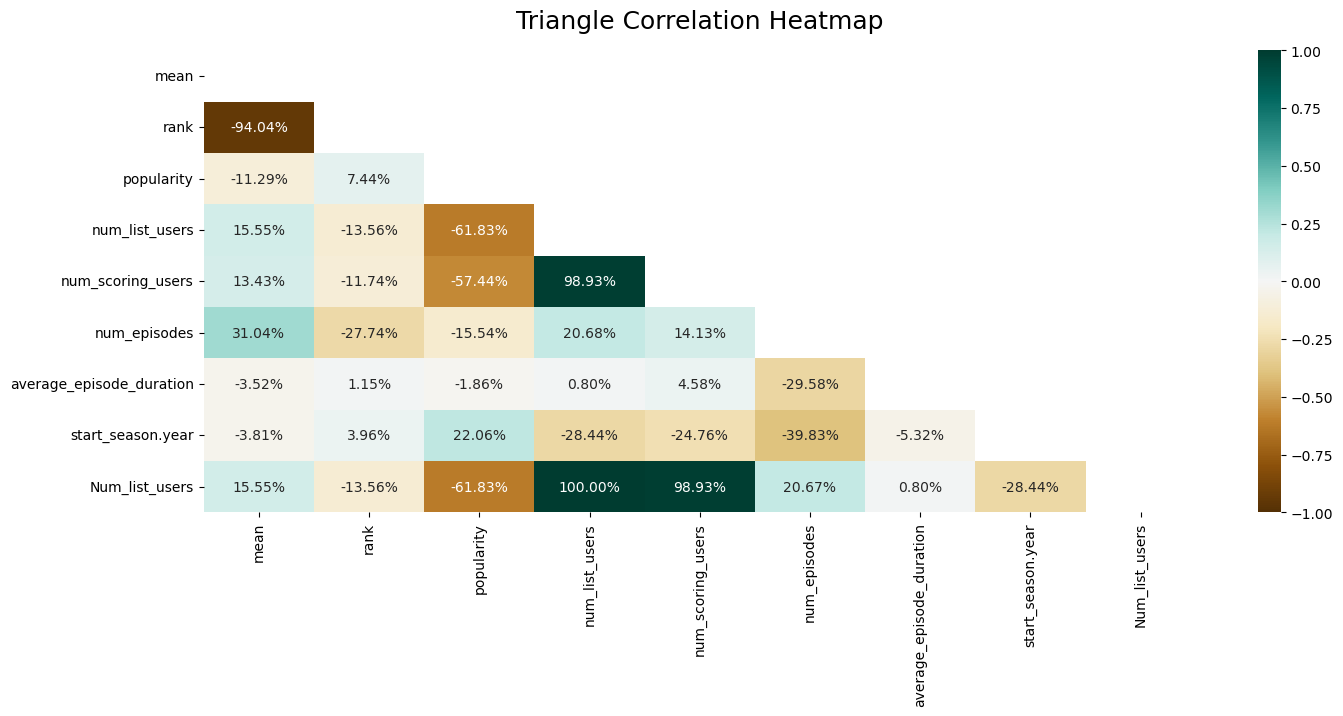

In [67]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_normalized.select_dtypes(exclude=['object']).corr().round(3), dtype=np.bool_))

heatmap = sns.heatmap(df_normalized.select_dtypes(exclude=['object']).corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2%", cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

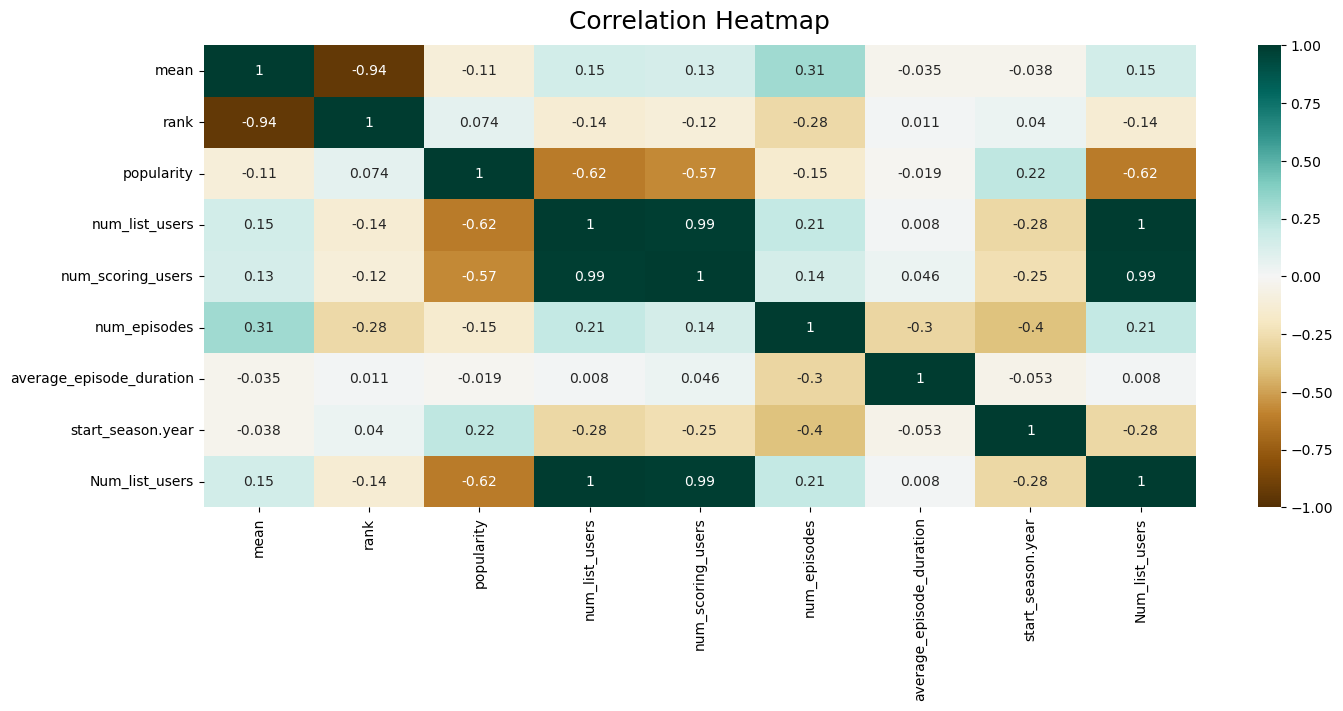

In [68]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_normalized.select_dtypes(exclude=['object']).corr().round(3), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

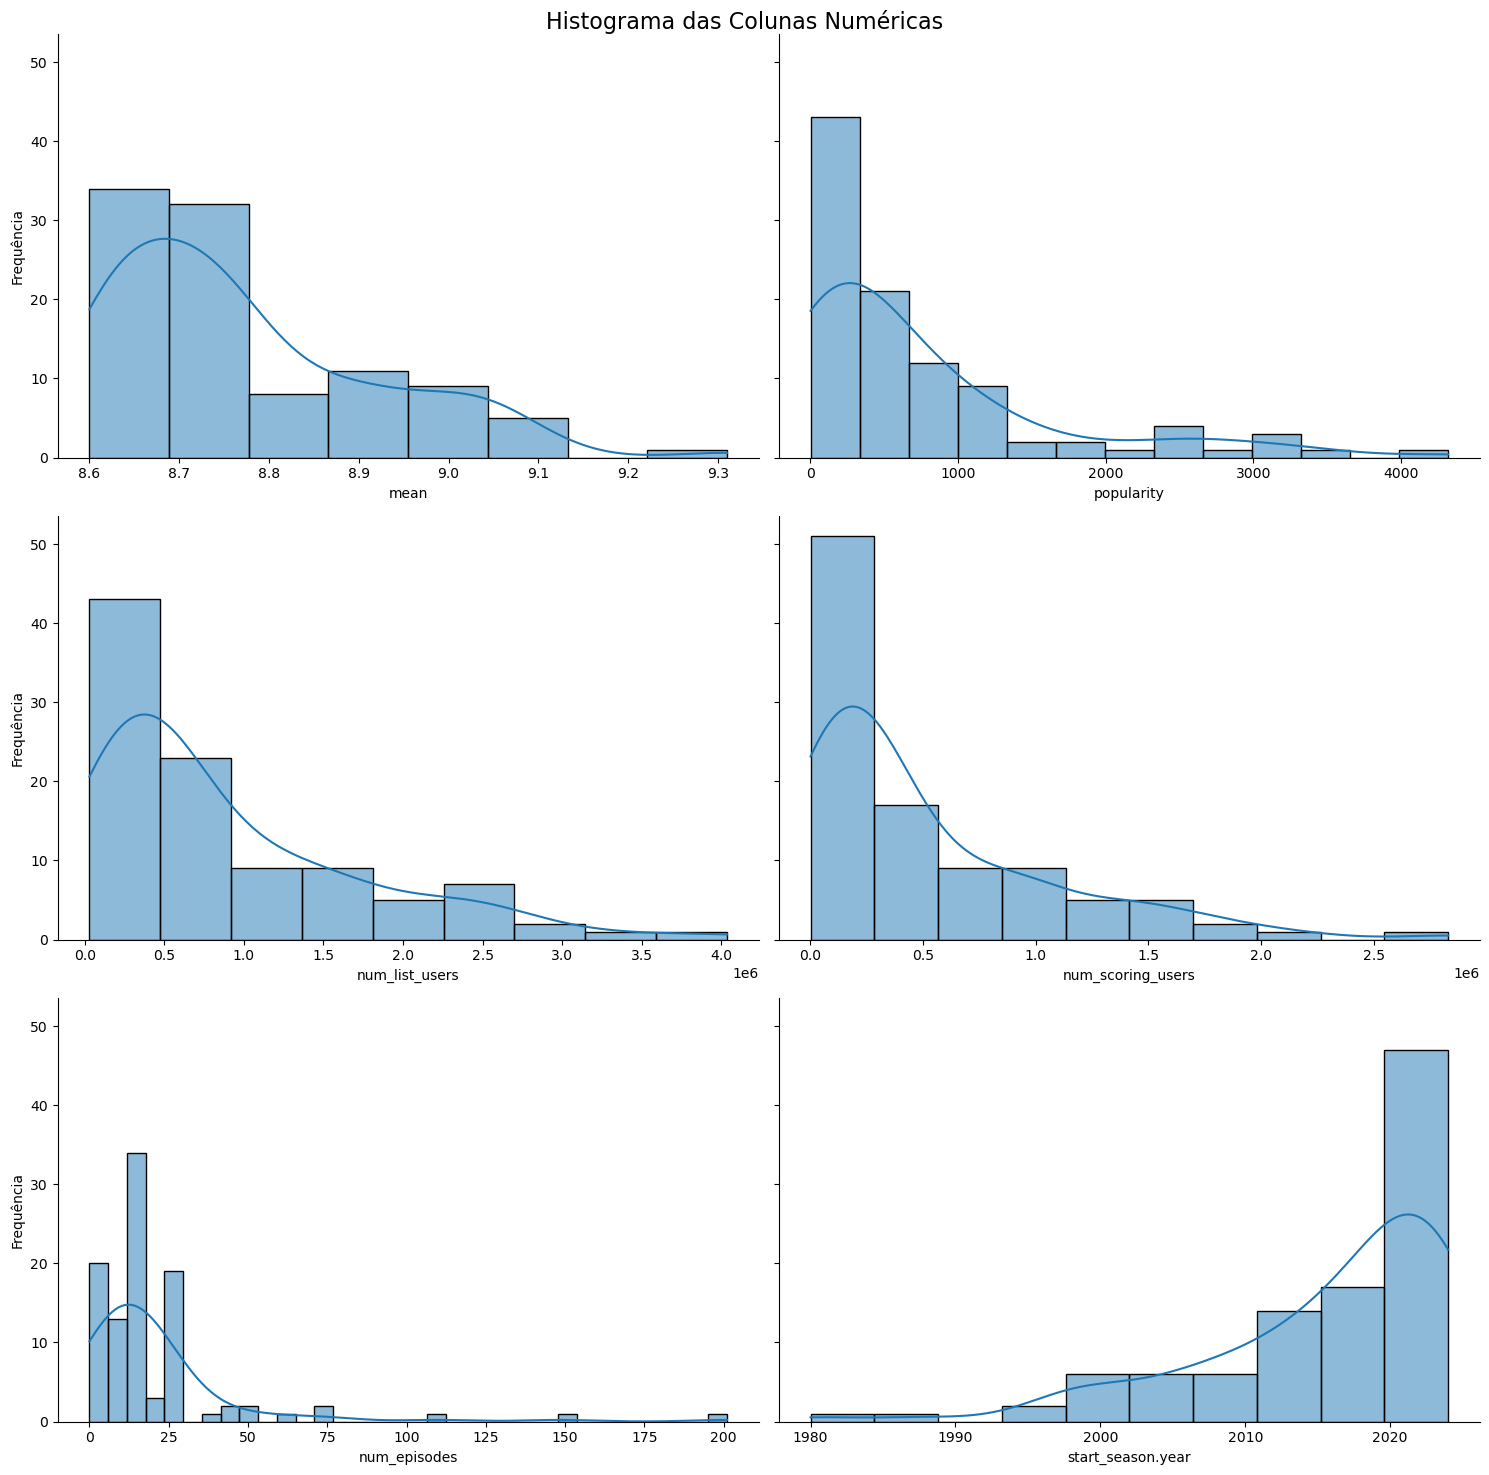

In [69]:
# Selecionar apenas as colunas numéricas
col_num = df_normalized[['mean', 'popularity', 'num_list_users', 'num_scoring_users',
       'num_episodes', 'start_season.year']]

# Criar subplots com 3 linhas e 2 colunas
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)

# Iterar sobre as colunas numéricas e criar os histogramas
for i, col in enumerate(col_num.columns):
    row, col_idx = divmod(i, 2)  # Calcular a posição do subplot
    sns.histplot(df_normalized[col], ax=axes[row, col_idx], kde=True)
    sns.despine(right=True, top=True)
    #col_name = ' '.join(col.split('.')[1:])
    #print(col_name)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequência')
    

fig.suptitle('Histograma das Colunas Numéricas', fontsize=16)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


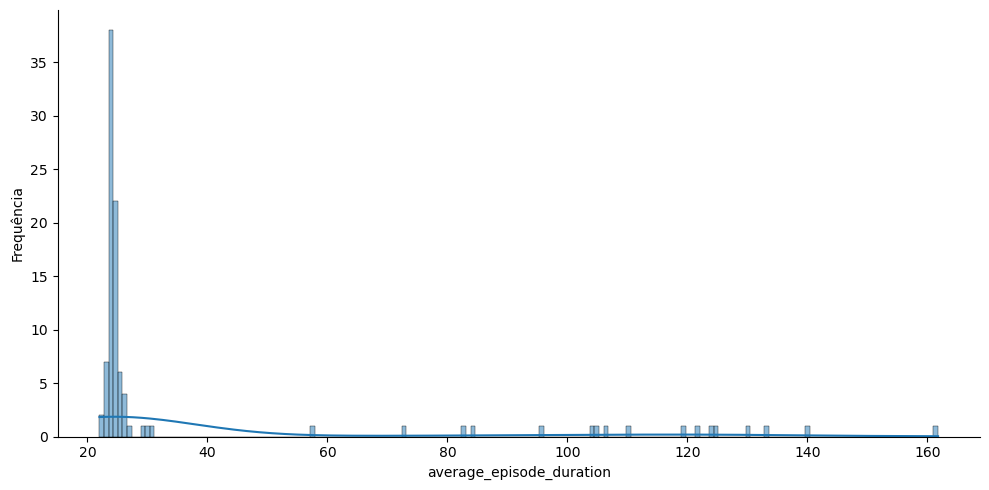

In [70]:
# Criar subplots com 1 linha e 1 coluna
fig, axes = plt.subplots(figsize=(10,5))

sns.histplot(df_normalized['average_episode_duration'], kde=True)
sns.despine(right=True, top=True)
axes.set_xlabel('average_episode_duration')
axes.set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [71]:
colunas_categoricas = ['nsfw', 'media_type', 'source', 'rating', 'start_season.season', 'broadcast.day_of_the_week', 'genres', 'studios']

#

for col in colunas_categoricas:
    print(f'{col}: {df_normalized[col].unique()}')



nsfw: ['Safe for work' 'May be not safe for work']
media_type: ['tv' 'tv_special' 'movie' 'ova']
source: ['manga' 'light_novel' 'visual_novel' 'novel' 'original' 'web_manga'
 '4_koma_manga' 'web_novel' 'game']
rating: ['Teens 13 and Older' 'Violence and Profanity' 'Profanity and Mild Nudity'
 'Children' 'All ages']
start_season.season: ['fall' 'spring' 'winter' 'summer']
broadcast.day_of_the_week: ['friday' 'sunday' 'wednesday' 'monday' 'thursday' 'tuesday' 'saturday']
genres: ['Adventure' 'Action' 'Drama' 'Adult Cast' 'Comedy' 'Award Winning'
 'Childcare' 'School' 'Combat Sports' 'CGDCT' 'Iyashikei' 'Psychological']
studios: ['Madhouse' 'Bones' 'Toei Animation' 'White Fox' 'Wit Studio'
 'Bandai Namco Pictures' 'Sunrise' 'K-Factory' 'Pierrot' 'A-1 Pictures'
 'TMS Entertainment' 'Kyoto Animation' 'Shaft' 'OLM' 'MAPPA'
 'CoMix Wave Films' 'Studio Ghibli' 'Shin-Ei Animation' 'Production I.G'
 'Pierrot Films' 'CloverWorks' 'LAN Studio' 'ufotable'
 'Tokyo Movie Shinsha' 'Artland' 'CMC Media

In [72]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'error', sparse_output=False), colunas_categoricas), remainder='passthrough')

dados = one_hot_enc.fit_transform(df_normalized)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out(), index=df_normalized.index)
dados

onehotencoder__nsfw_May be not safe for work  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
95                                          0.0   
96                                          0.0   
97                                          0.0   
98                                          0.0   
99                                          0.0   

   onehotencoder__nsfw_Safe for work onehotencoder__media_type_movie  \
0                                1.0                             0.0   
1                                1.0                             0.0   
2                                1.0                             0.0   
3                                1.0                             0.0   
4                                1.0                             0.0   
..                               ...                             ...   
95                               1.0                             0.0   
96                               1.0                             0.0   
97                               1.0                             0.0   
98                               1.0                             0.0   
99                               1.0                             1.0   

   onehotencoder__media_type_ova onehotencoder__media_type_tv  \
0                            0.0                          1.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          1.0   
4                            0.0                          1.0   
..                           ...                          ...   
95                           0.0                          1.0   
96                           0.0                          1.0   
97                           0.0                          1.0   
98                           0.0                          1.0   
99                           0.0                          0.0   

   onehotencoder__media_type_tv_special onehotencoder__source_4_koma_manga  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   1.0                                0.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   
..                                  ...                                ...   
95                                  0.0                                0.0   
96                                  0.0                                0.0   
97                                  0.0                                0.0   
98                                  0.0                                0.0   
99                                  0.0                                0.0   

   onehotencoder__source_game onehotencoder__source_light_novel  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               1.0   
3                         0.0                               0.0   
4                         0.0                               0.0   
..                        ...                               ...   
95                        0.0                               0.0   
96                        0.0                               0.0   
97                        0.0                               0.0   
98                        0.0                               0.0   
99                        0.0                               1.0   

  

In [78]:
dados.filter(like='remainder').columns
one_hot_corr = dados[['remainder__mean', 'remainder__rank', 'onehotencoder__studios_A-1 Pictures',
 'onehotencoder__studios_Artland',
 'onehotencoder__studios_Bandai Namco Pictures',
 'onehotencoder__studios_Bones',
 "onehotencoder__studios_Brain's Base",
 'onehotencoder__studios_CloverWorks',
 'onehotencoder__studios_CoMix Wave Films',
 #'onehotencoder__studios_David Production',
 'onehotencoder__studios_Doga Kobo',
 'onehotencoder__studios_Gainax',
 'onehotencoder__studios_K-Factory',
 #'onehotencoder__studios_Khara',
 'onehotencoder__studios_Kinema Citrus',
 'onehotencoder__studios_Kyoto Animation',
 'onehotencoder__studios_LAN Studio',
 'onehotencoder__studios_MAPPA',
 'onehotencoder__studios_Madhouse',
 'onehotencoder__studios_OLM',
 'onehotencoder__studios_Pierrot',
 'onehotencoder__studios_Production I.G',
 'onehotencoder__studios_Red Dog Culture House',
 'onehotencoder__studios_Shaft',
 'onehotencoder__studios_Shin-Ei Animation',
 'onehotencoder__studios_Shuka',
 'onehotencoder__studios_Studio Bind',
 #'onehotencoder__studios_Studio Chizu',
 'onehotencoder__studios_Studio Deen',
 'onehotencoder__studios_Studio Ghibli',
 'onehotencoder__studios_Sunrise',
 'onehotencoder__studios_TMS Entertainment',
 'onehotencoder__studios_Tatsunoko Production',
 'onehotencoder__studios_Toei Animation',
 'onehotencoder__studios_Tokyo Movie Shinsha',
 'onehotencoder__studios_Trigger',
 'onehotencoder__studios_White Fox',
 'onehotencoder__studios_Wit Studio',
 'onehotencoder__studios_ufotable']]

In [79]:
one_hot_corr.corr().round(3)

remainder__mean  \
remainder__mean                                         1.000   
remainder__rank                                        -0.940   
onehotencoder__studios_A-1 Pictures                    -0.044   
onehotencoder__studios_Artland                         -0.100   
onehotencoder__studios_Bandai Namco Pictures            0.282   
onehotencoder__studios_Bones                            0.051   
onehotencoder__studios_Brain's Base                    -0.089   
onehotencoder__studios_CloverWorks                     -0.007   
onehotencoder__studios_CoMix Wave Films                 0.041   
onehotencoder__studios_Doga Kobo                       -0.165   
onehotencoder__studios_Gainax                          -0.096   
onehotencoder__studios_K-Factory                        0.163   
onehotencoder__studios_Kinema Citrus                   -0.175   
onehotencoder__studios_Kyoto Animation                  0.025   
onehotencoder__studios_LAN Studio                      -0.088   
onehotencoder__studios_MAPPA                            0.043   
onehotencoder__studios_Madhouse                         0.132   
onehotencoder__studios_OLM                             -0.072   
onehotencoder__studios_Pierrot                          0.011   
onehotencoder__studios_Production I.G                  -0.116   
onehotencoder__studios_Red Dog Culture House           -0.075   
onehotencoder__studios_Shaft                            0.055   
onehotencoder__studios_Shin-Ei Animation               -0.000   
onehotencoder__studios_Shuka                           -0.109   
onehotencoder__studios_Studio Bind                     -0.082   
onehotencoder__studios_Studio Deen                     -0.068   
onehotencoder__studios_Studio Ghibli                   -0.084   
onehotencoder__studios_Sunrise                          0.225   
onehotencoder__studios_TMS Entertainment                0.129   
onehotencoder__studios_Tatsunoko Production            -0.102   
onehotencoder__studios_Toei Animation                   0.091   
onehotencoder__studios_Tokyo Movie Shinsha             -0.028   
onehotencoder__studios_Trigger                         -0.155   
onehotencoder__studios_White Fox                        0.116   
onehotencoder__studios_Wit Studio                       0.051   
onehotencoder__studios_ufotable                        -0.078   

                                              remainder__rank  \
remainder__mean                                        -0.940   
remainder__rank                                         1.000   
onehotencoder__studios_A-1 Pictures                     0.055   
onehotencoder__studios_Artland                          0.089   
onehotencoder__studios_Bandai Namco Pictures           -0.275   
onehotencoder__studios_Bones                           -0.050   
onehotencoder__studios_Brain's Base                     0.099   
onehotencoder__studios_CloverWorks                     -0.020   
onehotencoder__studios_CoMix Wave Films                -0.079   
onehotencoder__studios_Doga Kobo                        0.232   
onehotencoder__studios_Gainax                           0.113   
onehotencoder__studios_K-Factory                       -0.139   
onehotencoder__studios_Kinema Citrus                    0.219   
onehotencoder__studios_Kyoto Animation                 -0.030   
onehotencoder__studios_LAN Studio                       0.071   
onehotencoder__studios_MAPPA                           -0.127   
onehotencoder__studios_Madhouse                        -0.040   
onehotencoder__studios_OLM                              0.095   
onehotencoder__studios_Pierrot                         -0.045   
onehotencoder__studios_Production I.G                   0.120   
onehotencoder__studios_Red Dog Culture House            0.078   
onehotencoder__studios_Shaft                           -0.124   
onehotencoder__studios_Shin-Ei Animation               -0.048   
onehotencoder__studios_Shuka                            0.148   
onehotencoder__

In [80]:
print(len(df_normalized['studios'].unique()))

39


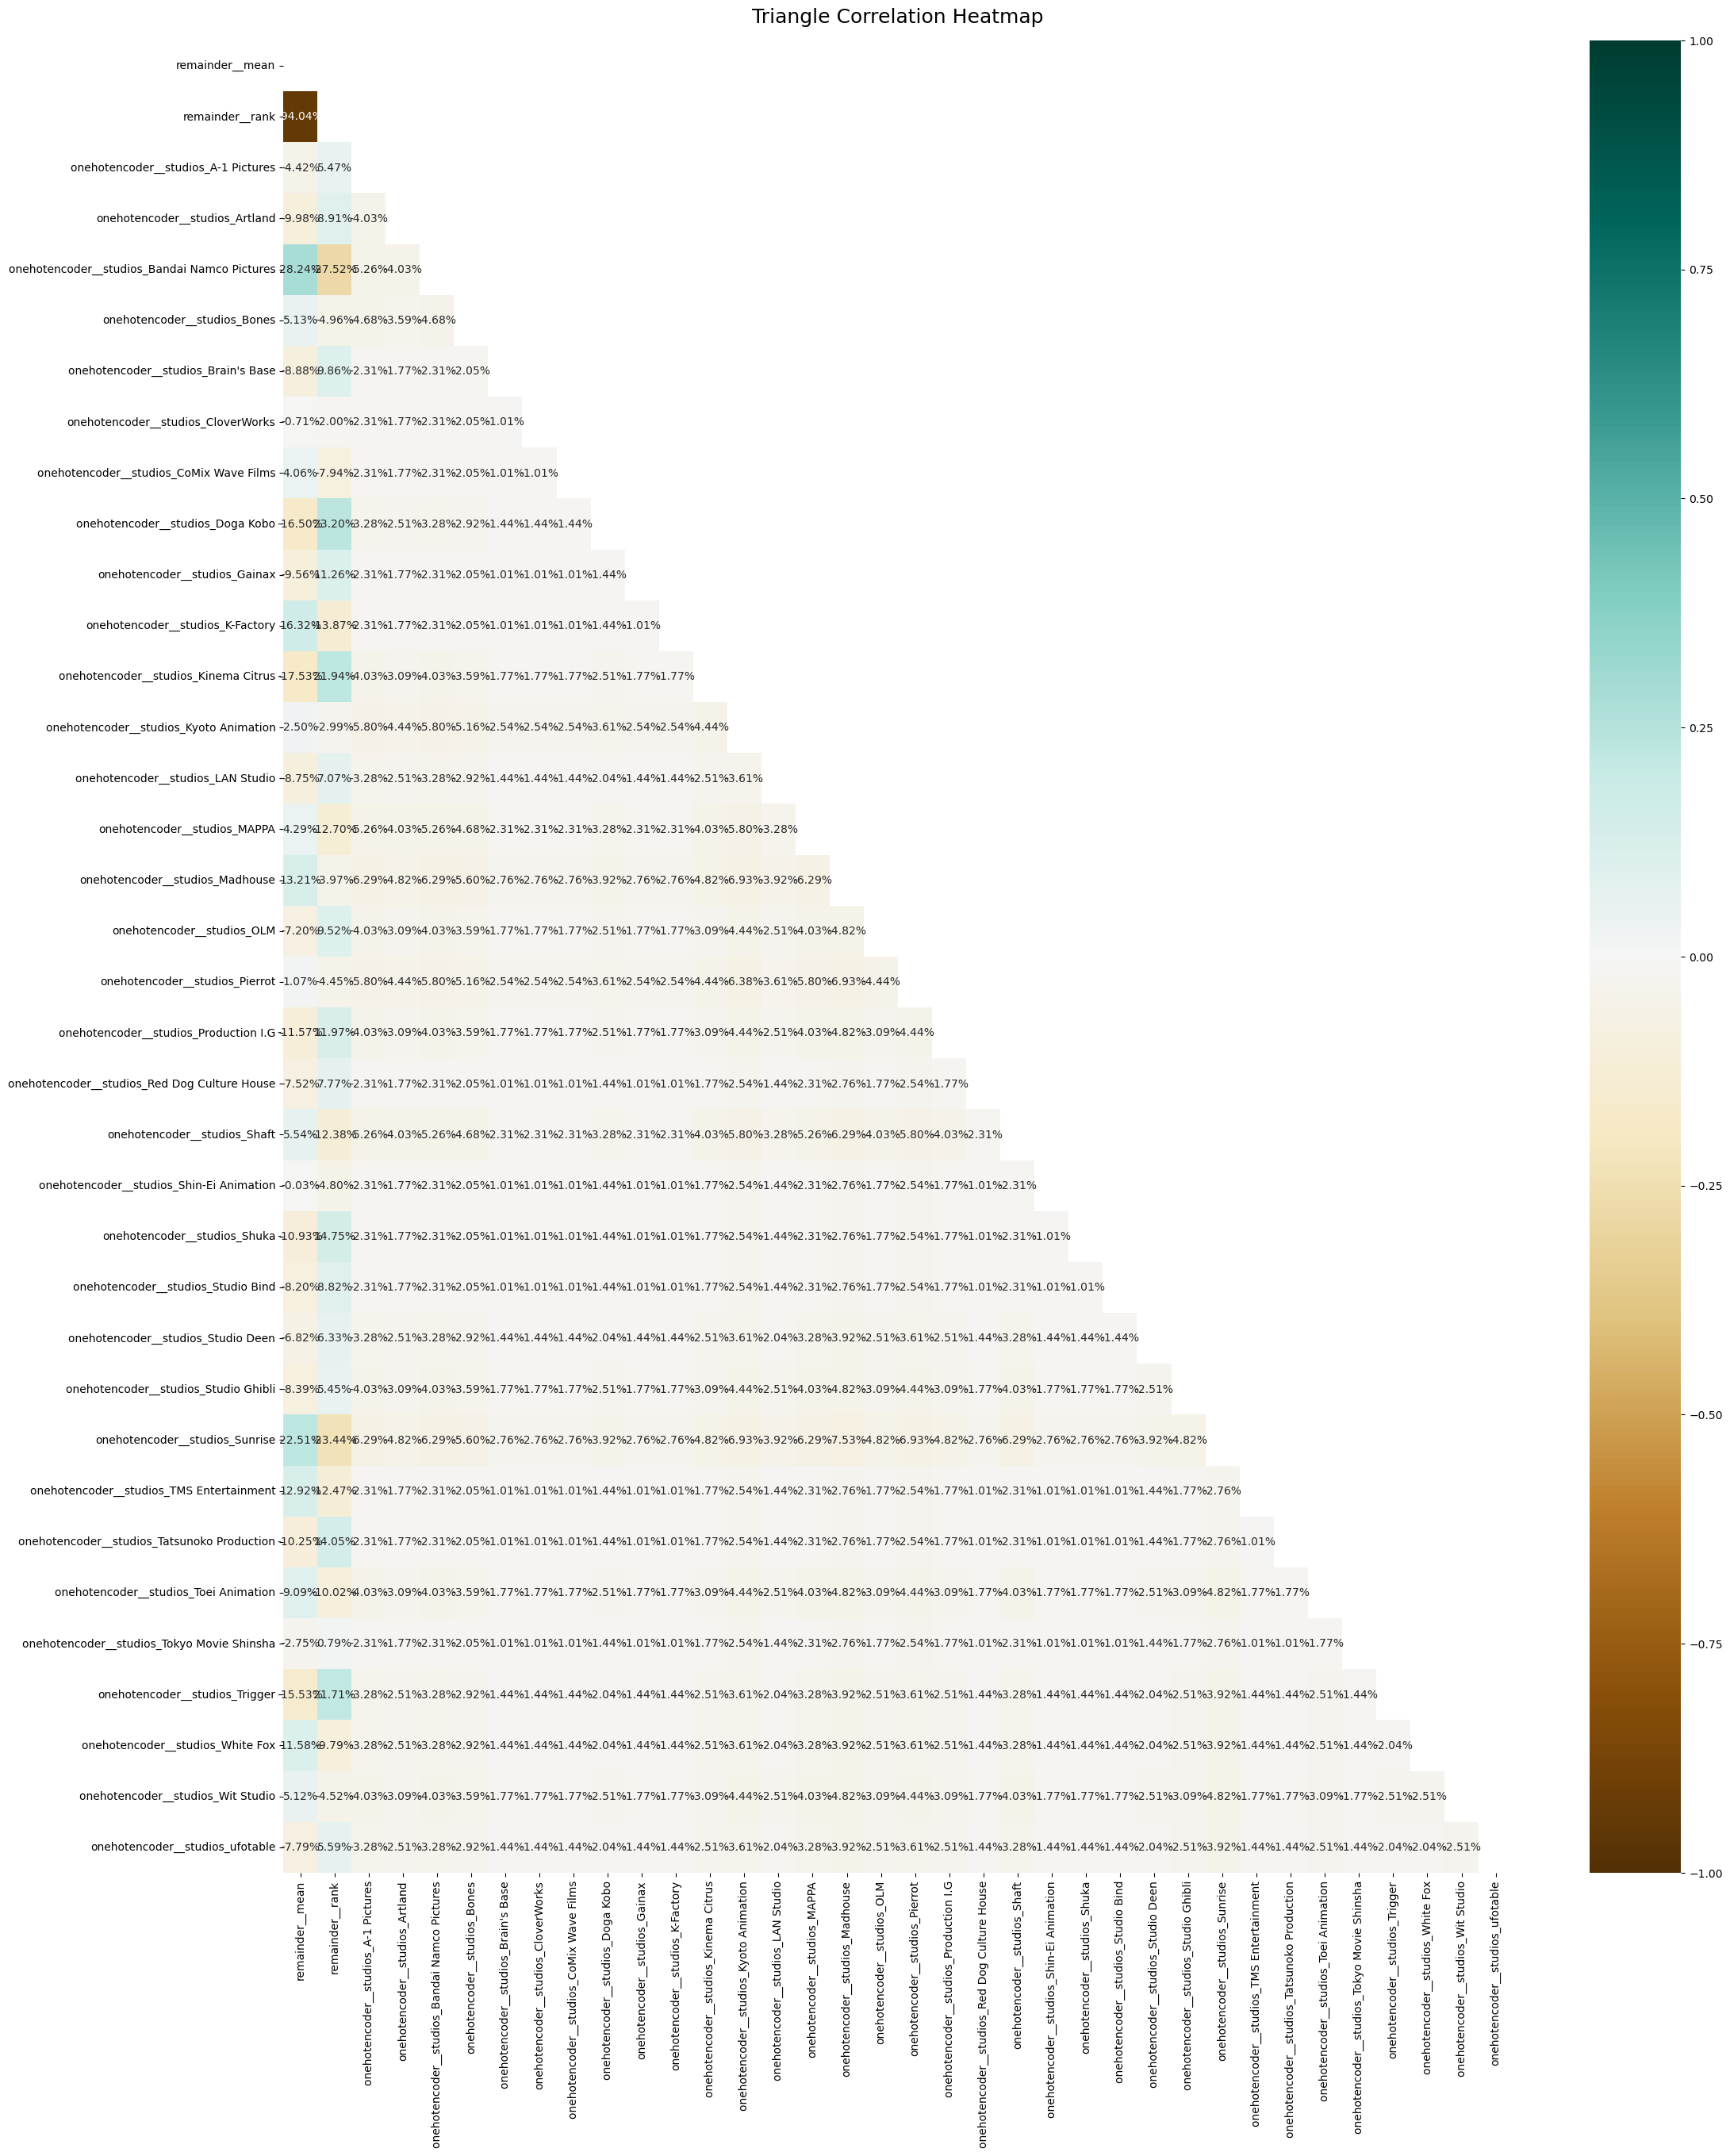

In [81]:
plt.figure(figsize=(25, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(one_hot_corr.corr(), dtype=np.bool_))

heatmap = sns.heatmap(one_hot_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2%", cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [82]:
#one_hot_data = pd.get_dummies(dados)
one_hot_data = pd.get_dummies(dados.filter(like='onehotencoder').columns)


In [83]:
'''
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(one_hot_data.corr(), dtype=np.bool_))

heatmap = sns.heatmap(one_hot_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2%", cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
'''

'\nplt.figure(figsize=(16, 6))\n# define the mask to set the values in the upper triangle to True\nmask = np.triu(np.ones_like(one_hot_data.corr(), dtype=np.bool_))\n\nheatmap = sns.heatmap(one_hot_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2%", cmap=\'BrBG\')\nheatmap.set_title(\'Triangle Correlation Heatmap\', fontdict={\'fontsize\':18}, pad=16);\n'

In [84]:
'''
def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

mae_one_hot_encoded = get_mae(one_hot_data, target)

print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))
'''

"\ndef get_mae(X, y):\n    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention\n    return -1 * cross_val_score(RandomForestRegressor(50), \n                                X, y, \n                                scoring = 'neg_mean_absolute_error').mean()\n\nmae_one_hot_encoded = get_mae(one_hot_data, target)\n\nprint('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))\n"

In [85]:
#one_hot_data.filter.corr()

In [86]:
df_normalized_ajust = df_normalized.copy()
df_normalized_ajust.drop(['title', 'start_date', 'background', 'end_date', 'synopsis', 'alternative_titles.en', 'Watching', 'Completed', 'On_hold', 'Dropped', 'Plan_to_watch'], axis=1, inplace=True)

In [87]:
df_normalized_ajust.columns

Index(['mean', 'rank', 'popularity', 'num_list_users', 'num_scoring_users',
       'nsfw', 'media_type', 'status', 'num_episodes', 'source',
       'average_episode_duration', 'rating', 'start_season.year',
       'start_season.season', 'Num_list_users', 'broadcast.day_of_the_week',
       'broadcast.start_time', 'genres', 'studios'],
      dtype='object')

In [88]:
for col in df_normalized_ajust.select_dtypes(include=['object']).columns:
    print(f'{col}: {df_normalized_ajust[col].unique()}')

nsfw: ['Safe for work' 'May be not safe for work']
media_type: ['tv' 'tv_special' 'movie' 'ova']
status: ['finished_airing' 'currently_airing']
source: ['manga' 'light_novel' 'visual_novel' 'novel' 'original' 'web_manga'
 '4_koma_manga' 'web_novel' 'game']
rating: ['Teens 13 and Older' 'Violence and Profanity' 'Profanity and Mild Nudity'
 'Children' 'All ages']
start_season.season: ['fall' 'spring' 'winter' 'summer']
broadcast.day_of_the_week: ['friday' 'sunday' 'wednesday' 'monday' 'thursday' 'tuesday' 'saturday']
broadcast.start_time: ['23:00' '17:00' '21:00' '02:05' '00:10' '18:00' '10:55' '00:00' '01:35'
 '01:30' '01:59' '01:05' '00:40' '00:30' '01:55' '00:50' '23:56' '00:05'
 '01:00' '23:15' '09:30' '22:30' '01:25' '02:25' '19:30' '01:29' '03:40'
 '02:00' '21:30' '01:20' '00:35' '08:30' '00:26' '00:56' '02:58' '23:30'
 '01:45']
genres: ['Adventure' 'Action' 'Drama' 'Adult Cast' 'Comedy' 'Award Winning'
 'Childcare' 'School' 'Combat Sports' 'CGDCT' 'Iyashikei' 'Psychological']
stud

In [89]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Definir as colunas categóricas
cat_col = ['nsfw', 'media_type', 'status', 'source', 'rating', 'start_season.season', 'broadcast.day_of_the_week', 'broadcast.start_time', 'genres', 'studios']

# Criar o transformador de colunas
one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), cat_col), remainder='passthrough')

# Aplicar o transformador ao DataFrame
dados_ohe = one_hot_enc.fit_transform(df_normalized_ajust)

# Verificar o shape do array transformado
print("Shape dos dados transformados:", dados_ohe.shape)

# Obter os nomes das colunas
col_names = one_hot_enc.get_feature_names_out()
print("Nomes das colunas geradas pelo OneHotEncoder:")
print(col_names)

# Garantir que o número de colunas gerado pelo OneHotEncoder corresponde ao esperado
assert dados_ohe.shape[1] == len(col_names), f"O número de colunas gerado ({dados_ohe.shape[1]}) não corresponde ao número esperado ({len(col_names)})."

# Criar um novo DataFrame com as colunas corretamente nomeadas
dados_ohe_df = pd.DataFrame(dados_ohe.toarray(), columns=col_names)

# Verificar informações do DataFrame
print(dados_ohe_df.info())

# Exibir o DataFrame resultante
dados_ohe_df.head()


Shape dos dados transformados: (100, 130)
Nomes das colunas geradas pelo OneHotEncoder:
['onehotencoder__nsfw_May be not safe for work'
 'onehotencoder__nsfw_Safe for work' 'onehotencoder__media_type_movie'
 'onehotencoder__media_type_ova' 'onehotencoder__media_type_tv'
 'onehotencoder__media_type_tv_special'
 'onehotencoder__status_currently_airing'
 'onehotencoder__status_finished_airing'
 'onehotencoder__source_4_koma_manga' 'onehotencoder__source_game'
 'onehotencoder__source_light_novel' 'onehotencoder__source_manga'
 'onehotencoder__source_novel' 'onehotencoder__source_original'
 'onehotencoder__source_visual_novel' 'onehotencoder__source_web_manga'
 'onehotencoder__source_web_novel' 'onehotencoder__rating_All ages'
 'onehotencoder__rating_Children'
 'onehotencoder__rating_Profanity and Mild Nudity'
 'onehotencoder__rating_Teens 13 and Older'
 'onehotencoder__rating_Violence and Profanity'
 'onehotencoder__start_season.season_fall'
 'onehotencoder__start_season.season_spring'
 'o

onehotencoder__nsfw_May be not safe for work  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   onehotencoder__nsfw_Safe for work  onehotencoder__media_type_movie  \
0                                1.0                              0.0   
1                                1.0                              0.0   
2                                1.0                              0.0   
3                                1.0                              0.0   
4                                1.0                              0.0   

   onehotencoder__media_type_ova  onehotencoder__media_type_tv  \
0                            0.0                           1.0   
1                            0.0                           1.0   
2                            0.0                           0.0   
3                            0.0                           1.0   
4                            0.0                           1.0   

   onehotencoder__media_type_tv_special  \
0                                   0.0   
1                                   0.0   
2                                   1.0   
3                                   0.0   
4                                   0.0   

   onehotencoder__status_currently_airing  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   onehotencoder__status_finished_airing  onehotencoder__source_4_koma_manga  \
0                                    1.0                                 0.0   
1                                    1.0                                 0.0   
2                                    1.0                                 0.0   
3                                    1.0                                 0.0   
4                                    1.0                                 0.0   

   onehotencoder__source_game  ...  onehotencoder__studios_ufotable  \
0                         0.0  ...                              0.0   
1                         0.0  ...                              0.0   
2                         0.0  ...                              0.0   
3                         0.0  ...                              0.0   
4                         0.0  ...                              0.0   

   remainder__mean  remainder__rank  remainder__popularity  \
0             9.31              1.0                  171.0   
1             9.10              2.0                    3.0   
2             9.07              3.0                 2546.0   
3             9.07              4.0                   14.0   
4             9.05              5.0                   21.0   

   remainder__num_list_users  remainder__num_scoring_users  \
0                   989481.0                      571459.0   
1                  3459792.0                     2182720.0   
2                    78968.0                       60363.0   
3                  2650625.0                     1440989.0   
4                  2386309.0                     1656481.0   

   remainder__num_episodes  remainder__average_episode_duration  \
0                     28.0                            24.500000   
1                     64.0                            24.333333   
2                      1.0                            24.916667   
3                     24.0                            24.333333   
4                     10.0                            23.916667   

   remainder__start_season.year  remainder__Num_list_users  
0                        2023.0                   989282.0  
1                        2009.0                  3459707.0  
2                        2024.0                    78958.0  
3                        2011

In [90]:
dados_ohe_df.columns

Index(['onehotencoder__nsfw_May be not safe for work',
       'onehotencoder__nsfw_Safe for work', 'onehotencoder__media_type_movie',
       'onehotencoder__media_type_ova', 'onehotencoder__media_type_tv',
       'onehotencoder__media_type_tv_special',
       'onehotencoder__status_currently_airing',
       'onehotencoder__status_finished_airing',
       'onehotencoder__source_4_koma_manga', 'onehotencoder__source_game',
       ...
       'onehotencoder__studios_ufotable', 'remainder__mean', 'remainder__rank',
       'remainder__popularity', 'remainder__num_list_users',
       'remainder__num_scoring_users', 'remainder__num_episodes',
       'remainder__average_episode_duration', 'remainder__start_season.year',
       'remainder__Num_list_users'],
      dtype='object', length=130)

In [91]:
dados_ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 130 entries, onehotencoder__nsfw_May be not safe for work to remainder__Num_list_users
dtypes: float64(130)
memory usage: 101.7 KB


In [92]:
dados_ohe_df.corr().round(3)

onehotencoder__nsfw_May be not safe for work  \
onehotencoder__nsfw_May be not safe for work                                         1.000   
onehotencoder__nsfw_Safe for work                                                   -1.000   
onehotencoder__media_type_movie                                                     -0.044   
onehotencoder__media_type_ova                                                       -0.032   
onehotencoder__media_type_tv                                                         0.063   
...                                                                                    ...   
remainder__num_scoring_users                                                        -0.069   
remainder__num_episodes                                                             -0.026   
remainder__average_episode_duration                                                 -0.047   
remainder__start_season.year                                                         0.095   
remainder__Num_list_users                                                           -0.077   

                                              onehotencoder__nsfw_Safe for work  \
onehotencoder__nsfw_May be not safe for work                             -1.000   
onehotencoder__nsfw_Safe for work                                         1.000   
onehotencoder__media_type_movie                                           0.044   
onehotencoder__media_type_ova                                             0.032   
onehotencoder__media_type_tv                                             -0.063   
...                                                                         ...   
remainder__num_scoring_users                                              0.069   
remainder__num_episodes                                                   0.026   
remainder__average_episode_duration                                       0.047   
remainder__start_season.year                                             -0.095   
remainder__Num_list_users                                                 0.077   

                                              onehotencoder__media_type_movie  \
onehotencoder__nsfw_May be not safe for work                           -0.044   
onehotencoder__nsfw_Safe for work                                       0.044   
onehotencoder__media_type_movie                                         1.000   
onehotencoder__media_type_ova                                          -0.137   
onehotencoder__media_type_tv                                           -0.700   
...                                                                       ...   
remainder__num_scoring_users                                            0.021   
remainder__num_episodes                                                -0.300   
remainder__average_episode_duration                                     0.947   
remainder__start_season.year                                           -0.013   
remainder__Num_list_users                                              -0.020   

                                              onehotencoder__media_type_ova  \
onehotencoder__nsfw_May be not safe for work                         -0.032   
onehotencoder__nsfw_Safe for work                                     0.032   
onehotencoder__media_type_movie                                      -0.137   
onehotencoder__media_type_ova                                         1.000   
onehotencoder__media_type_tv                                         -0.504   
...                                                                     ...   
remainder__num_scoring_users                                         -0.220   
remainder__num_episodes                                               0.010   
remainder__average_episode_duration                                  -0.122   
remainder__start_season.year                                          0.015   
remainder__Num_list_users                                            -0.236   

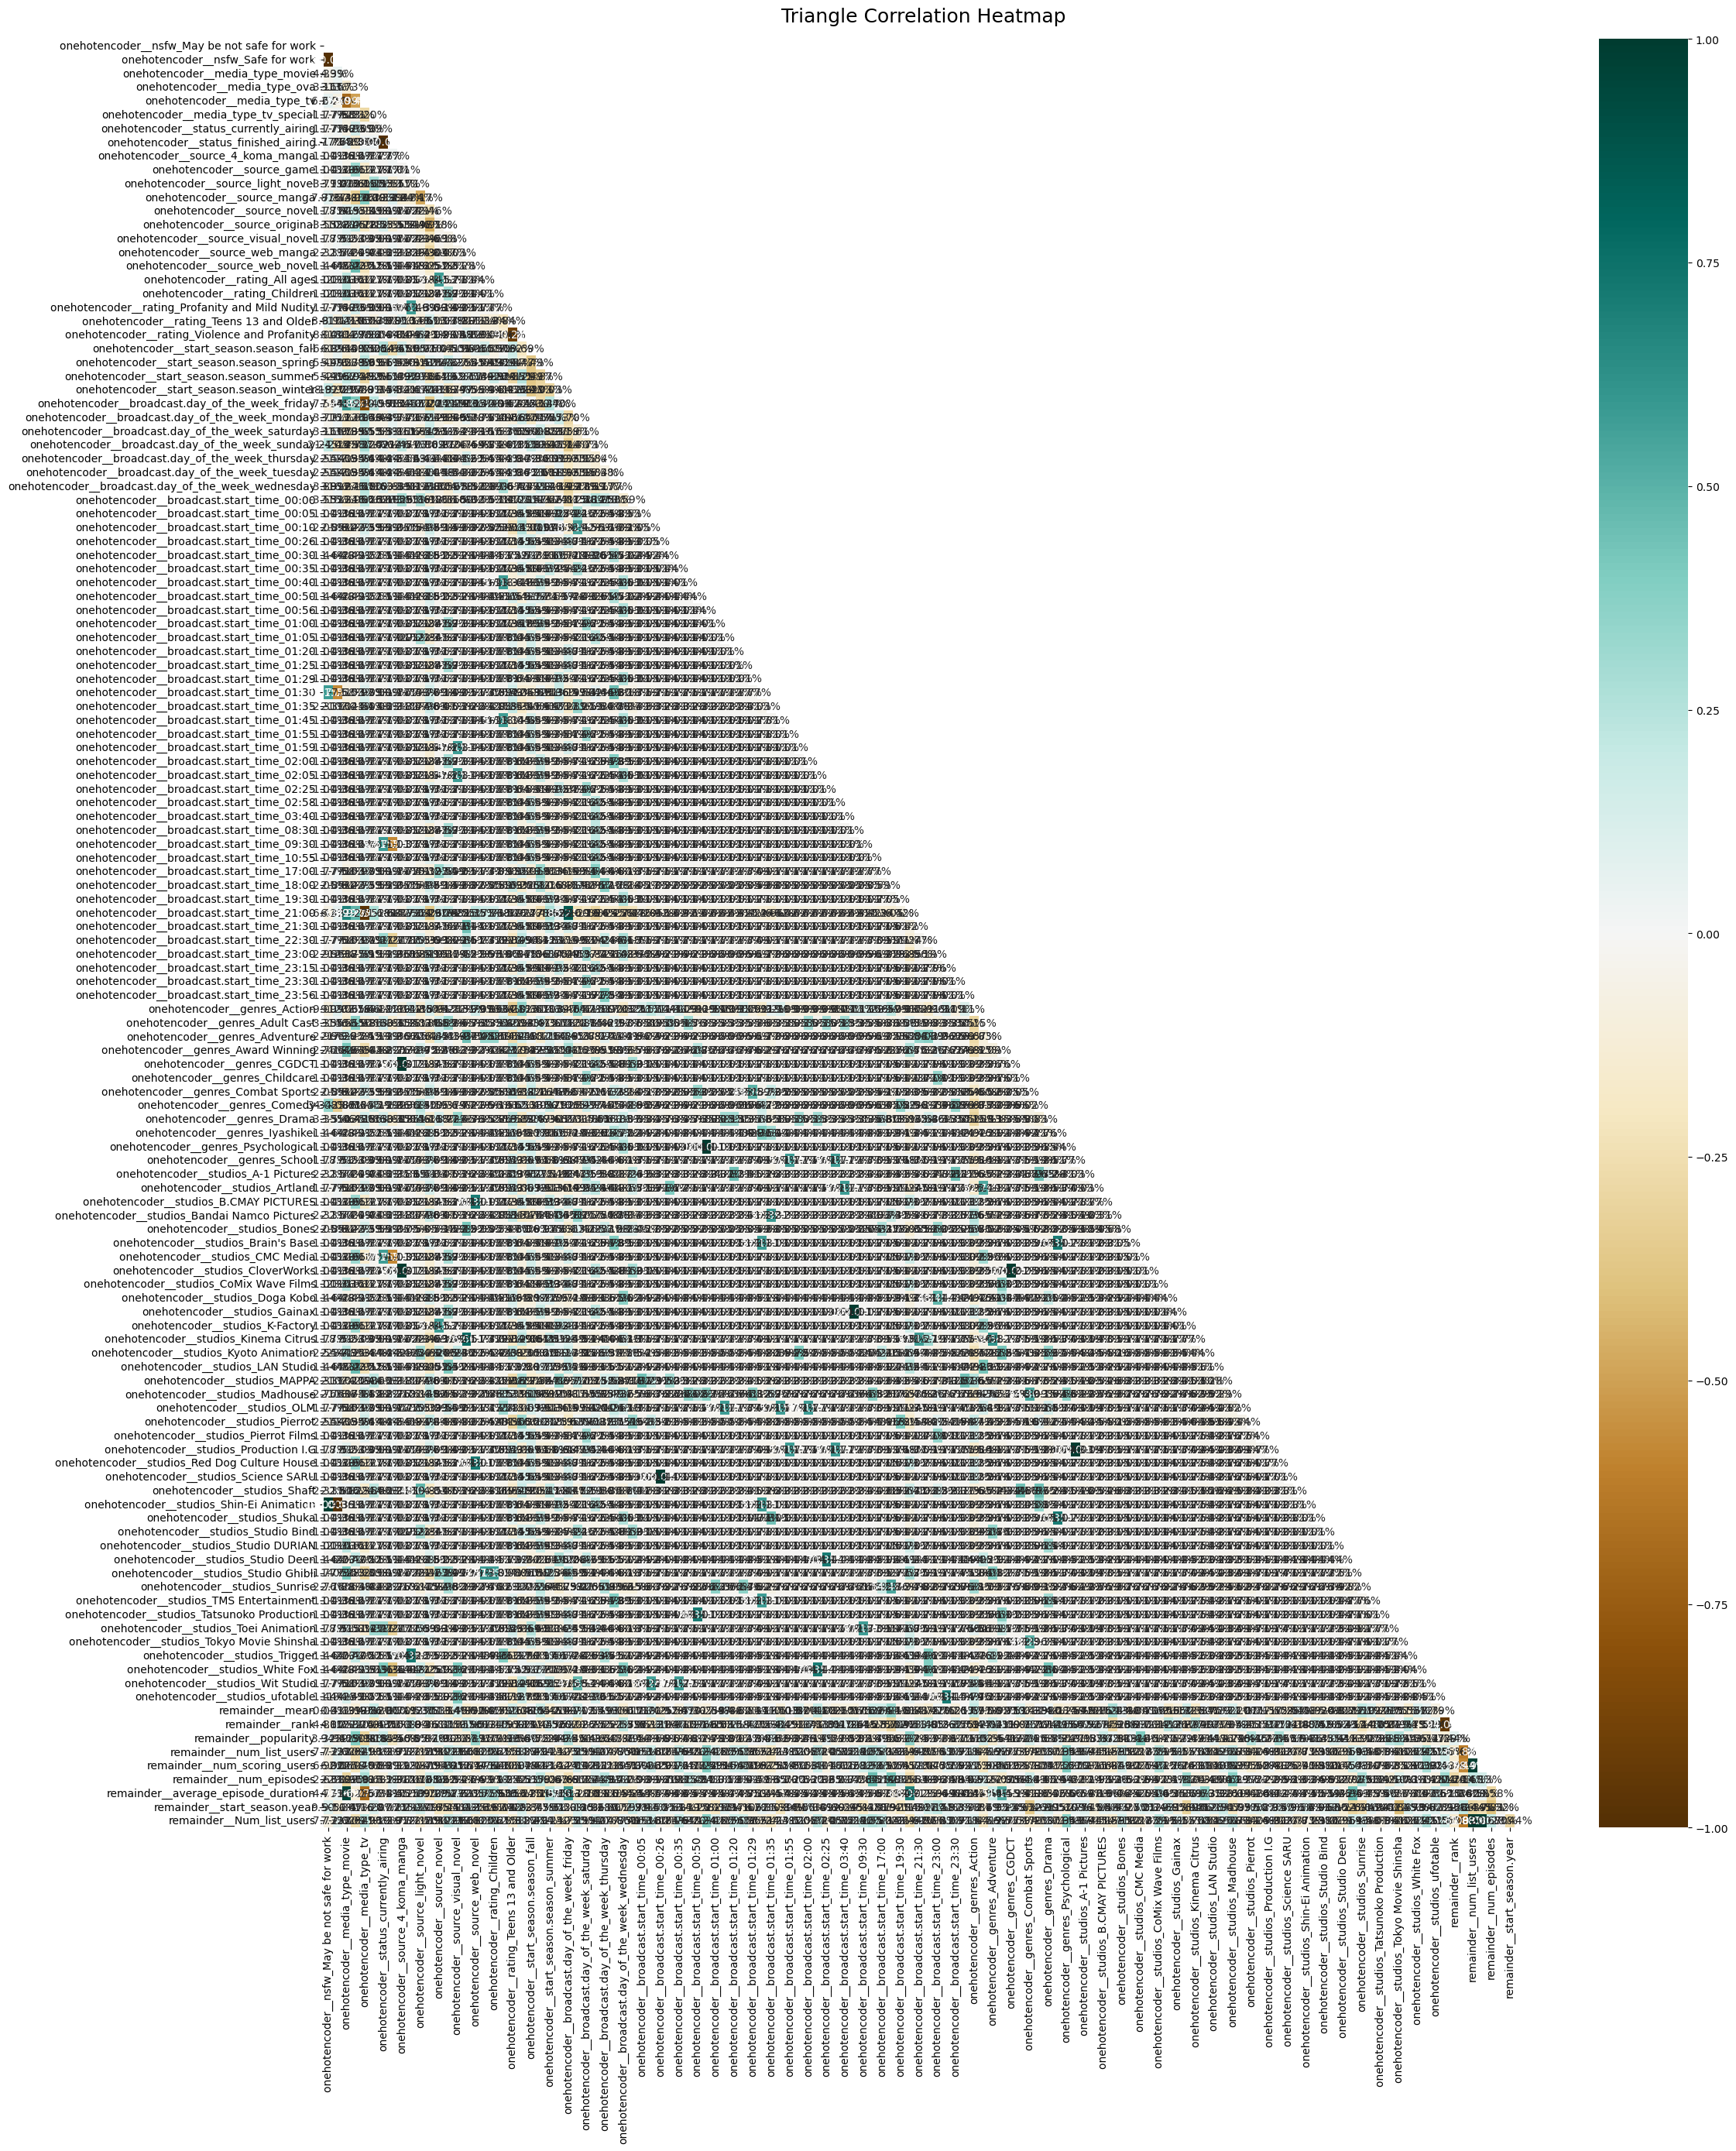

In [93]:
plt.figure(figsize=(25, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dados_ohe_df.corr(), dtype=np.bool_))

heatmap = sns.heatmap(dados_ohe_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2%", cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [94]:
dados_ohe_df.columns

Index(['onehotencoder__nsfw_May be not safe for work',
       'onehotencoder__nsfw_Safe for work', 'onehotencoder__media_type_movie',
       'onehotencoder__media_type_ova', 'onehotencoder__media_type_tv',
       'onehotencoder__media_type_tv_special',
       'onehotencoder__status_currently_airing',
       'onehotencoder__status_finished_airing',
       'onehotencoder__source_4_koma_manga', 'onehotencoder__source_game',
       ...
       'onehotencoder__studios_ufotable', 'remainder__mean', 'remainder__rank',
       'remainder__popularity', 'remainder__num_list_users',
       'remainder__num_scoring_users', 'remainder__num_episodes',
       'remainder__average_episode_duration', 'remainder__start_season.year',
       'remainder__Num_list_users'],
      dtype='object', length=130)

In [95]:
x = dados_ohe_df.drop(['remainder__mean'], axis=1)
y = dados_ohe_df['remainder__mean']

In [96]:
def metricas(y_test, y_pred):
    print(f'Acurácia: ', metrics.accuracy_score(y_test, y_pred))
    print(f'Precisão: ', metrics.precision_score(y_test, y_pred, average='micro'))
    print(f'Recall: ', metrics.recall_score(y_test, y_pred, average='micro'))
    print(f'F1: ', metrics.f1_score(y_test, y_pred, average='micro'))
    
def conf_matrix(cm, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()

In [97]:
seed = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

In [98]:
model = DecisionTreeClassifier(max_depth=5, random_state=seed)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metricas(y_test, y_pred)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.